### Author: Vaishnav Krishna P
#### INTERNSHIP : BHARAT INTERN
#### DATASET IS TAKEN FROM: https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv
#### Goal:
* It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

#### metrics:
* Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

#### ABOUT THE DATASET:
Data fields

* Here's a brief version of what you'll find in the data description file.

1. SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
2. MSSubClass: The building class
3. MSZoning: The general zoning classification
4. LotFrontage: Linear feet of street connected to property
5. LotArea: Lot size in square feet
6. Street: Type of road access
7. Alley: Type of alley access
8. LotShape: General shape of property
9. LandContour: Flatness of the property
10. Utilities: Type of utilities available
11. LotConfig: Lot configuration
12. LandSlope: Slope of property
13. Neighborhood: Physical locations within Ames city limits
14. Condition1: Proximity to main road or railroad
15. Condition2: Proximity to main road or railroad (if a second is present)
16. BldgType: Type of dwelling
17. HouseStyle: Style of dwelling
18. OverallQual: Overall material and finish quality
19. OverallCond: Overall condition rating
20. YearBuilt: Original construction date
21. YearRemodAdd: Remodel date
22. RoofStyle: Type of roof
23. RoofMatl: Roof material
24. Exterior1st: Exterior covering on house
25. Exterior2nd: Exterior covering on house (if more than one material)
26. MasVnrType: Masonry veneer type
27. MasVnrArea: Masonry veneer area in square feet
28. ExterQual: Exterior material quality
29. ExterCond: Present condition of the material on the exterior
30. Foundation: Type of foundation
31. BsmtQual: Height of the basement
32. BsmtCond: General condition of the basement
33. BsmtExposure: Walkout or garden level basement walls
34. BsmtFinType1: Quality of basement finished area
35. BsmtFinSF1: Type 1 finished square feet
36. BsmtFinType2: Quality of second finished area (if present)
37. BsmtFinSF2: Type 2 finished square feet
39. BsmtUnfSF: Unfinished square feet of basement area
40. TotalBsmtSF: Total square feet of basement area
41. Heating: Type of heating
42. HeatingQC: Heating quality and condition
43. CentralAir: Central air conditioning
44. Electrical: Electrical system
45. 1stFlrSF: First Floor square feet
46. 2ndFlrSF: Second floor square feet
47. LowQualFinSF: Low quality finished square feet (all floors)
48. GrLivArea: Above grade (ground) living area square feet
49. BsmtFullBath: Basement full bathrooms
50. BsmtHalfBath: Basement half bathrooms
51. FullBath: Full bathrooms above grade
52. HalfBath: Half baths above grade
53. Bedroom: Number of bedrooms above basement level
54. Kitchen: Number of kitchens
55. KitchenQual: Kitchen quality
56. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
57. Functional: Home functionality rating
58. Fireplaces: Number of fireplaces
59. FireplaceQu: Fireplace quality
60. GarageType: Garage location
61. GarageYrBlt: Year garage was built
62. GarageFinish: Interior finish of the garage
63. GarageCars: Size of garage in car capacity
64. GarageArea: Size of garage in square feet
65. GarageQual: Garage quality
66. GarageCond: Garage condition
67. PavedDrive: Paved driveway
68. WoodDeckSF: Wood deck area in square feet
69. OpenPorchSF: Open porch area in square feet
70. EnclosedPorch: Enclosed porch area in square feet
71. 3SsnPorch: Three season porch area in square feet
72. ScreenPorch: Screen porch area in square feet
73. PoolArea: Pool area in square feet
74. PoolQC: Pool quality
75. Fence: Fence quality
76. MiscFeature: Miscellaneous feature not covered in other categories
77. MiscVal: $Value of miscellaneous feature
78. MoSold: Month Sold
79. YrSold: Year Sold
80. SaleType: Type of sale
81. SaleCondition: Condition of sale

In [1]:
# Importing necessory libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

# print options 
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

#ignoring unnecessoty warnings 
import warnings
warnings.filterwarnings(action="ignore")

# importing scipy kurtosis and skew 
from scipy.stats import skew,kurtosis

# label encoder importing library
from sklearn.preprocessing import LabelEncoder

In [2]:
# Loading the datset 
df = pd.read_csv("train-advreg.csv")

In [3]:
# First five data points
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

* So, the datset contains 1460 records and 81 features

In [5]:
# Description about the datset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [6]:
# Datatypes of the features 
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


### EDA
1. MISSING VALUE ANALYSIS 
2. CONTINOUS FEATURES,DISCRETE FEATURES
3. DISTRIBUTION OF THE DATA 
4. CORELATION ANALYSIS
5. OUTLIER ANALYSIS
6. DATA VISUALISATION

### MISSING VALUE ANALYSIS 

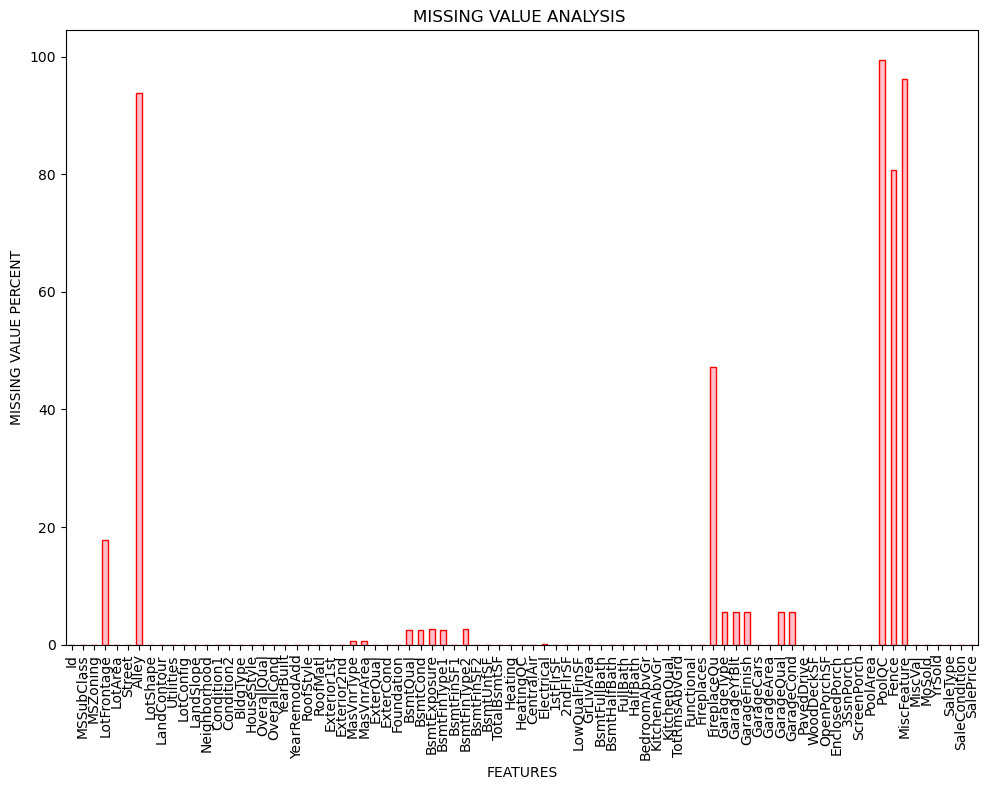

In [7]:
plt.figure(figsize=(10,8))
plt.title("MISSING VALUE ANALYSIS ")
(100*(df.isnull().sum()/len(df))).plot(kind="bar",color="pink",edgecolor="r")
plt.xticks(rotation=90)
plt.ylabel("MISSING VALUE PERCENT")
plt.xlabel("FEATURES")
plt.grid(False)
plt.tight_layout()
plt.show()

In [8]:
# Features with more than 80% missing value 
sparse_features = []
for feature in df.columns:
    if 100*(df[feature].isnull().sum()/len(df)) > 80:
        sparse_features.append(feature)

print("Features with more than 80% missing value: ",sparse_features)

Features with more than 80% missing value:  ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


* Sparse features can be ignored on the later on stage 

In [9]:
# Missing value features
missing_value_features = []

for feature in df.columns:
    if feature not in sparse_features:
        if df[feature].isnull().sum() > 0:
            missing_value_features.append(feature)

print("Missing Value features: ",missing_value_features)

Missing Value features:  ['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


In [10]:
# Non missing value features 
complete_features = []

for feature in df.columns:
    if df[feature].isnull().sum() == 0:
        complete_features.append(feature)

print("Non Missing value features: ",complete_features)

Non Missing value features:  ['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']


In [11]:
print("No Of sparse features: ",len(sparse_features))
print("No of Missing value features: ",len(missing_value_features))
print("No of Complete features: ",len(complete_features))

No Of sparse features:  4
No of Missing value features:  15
No of Complete features:  62


### CONTINOUS AND CATEGORICAL FEATURES

In [12]:
# No of unique values in each feature

for feature in df.columns:
    print("{}: No of missing values {}".format(feature,df[feature].nunique()))

Id: No of missing values 1460
MSSubClass: No of missing values 15
MSZoning: No of missing values 5
LotFrontage: No of missing values 110
LotArea: No of missing values 1073
Street: No of missing values 2
Alley: No of missing values 2
LotShape: No of missing values 4
LandContour: No of missing values 4
Utilities: No of missing values 2
LotConfig: No of missing values 5
LandSlope: No of missing values 3
Neighborhood: No of missing values 25
Condition1: No of missing values 9
Condition2: No of missing values 8
BldgType: No of missing values 5
HouseStyle: No of missing values 8
OverallQual: No of missing values 10
OverallCond: No of missing values 9
YearBuilt: No of missing values 112
YearRemodAdd: No of missing values 61
RoofStyle: No of missing values 6
RoofMatl: No of missing values 8
Exterior1st: No of missing values 15
Exterior2nd: No of missing values 16
MasVnrType: No of missing values 4
MasVnrArea: No of missing values 327
ExterQual: No of missing values 4
ExterCond: No of missing v

In [13]:
# Separating continous and categorical features 
continous_features = []
categorical_features = []

for feature in df.columns:
    if feature != "Id":
        if df[feature].nunique() <= 30:
            categorical_features.append(feature)
        else:
            continous_features.append(feature)

In [14]:
print("Continous features: \n",continous_features)
print("\nCategorical features: \n",categorical_features)

Continous features: 
 ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']

Categorical features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'Garag

In [15]:
print("No of continous features: ",len(continous_features))
print("No of categorical features: ",len(categorical_features))

No of continous features:  19
No of categorical features:  61


### DISTRIBUTION OF CONTINOUS FEATURES

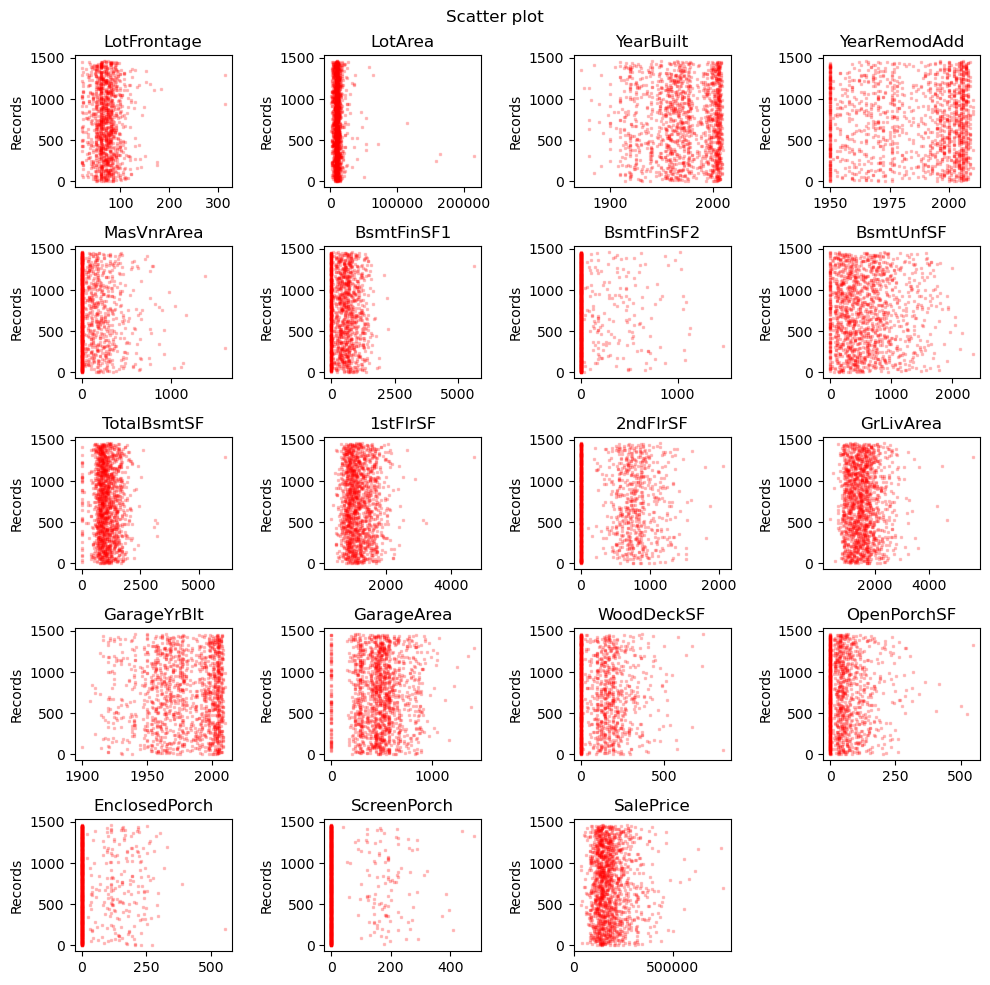

In [16]:
plt.figure(figsize=(10,10))
c = 1
plt.suptitle("Scatter plot")
for feature in continous_features:
    plt.subplot(5,4,c)
    c += 1
    plt.title("{}".format(feature))
    plt.scatter(df[feature],range(len(df[feature])),marker="s",s=2,alpha=0.2,color="r")
    plt.ylabel("Records")
plt.tight_layout()
plt.show()

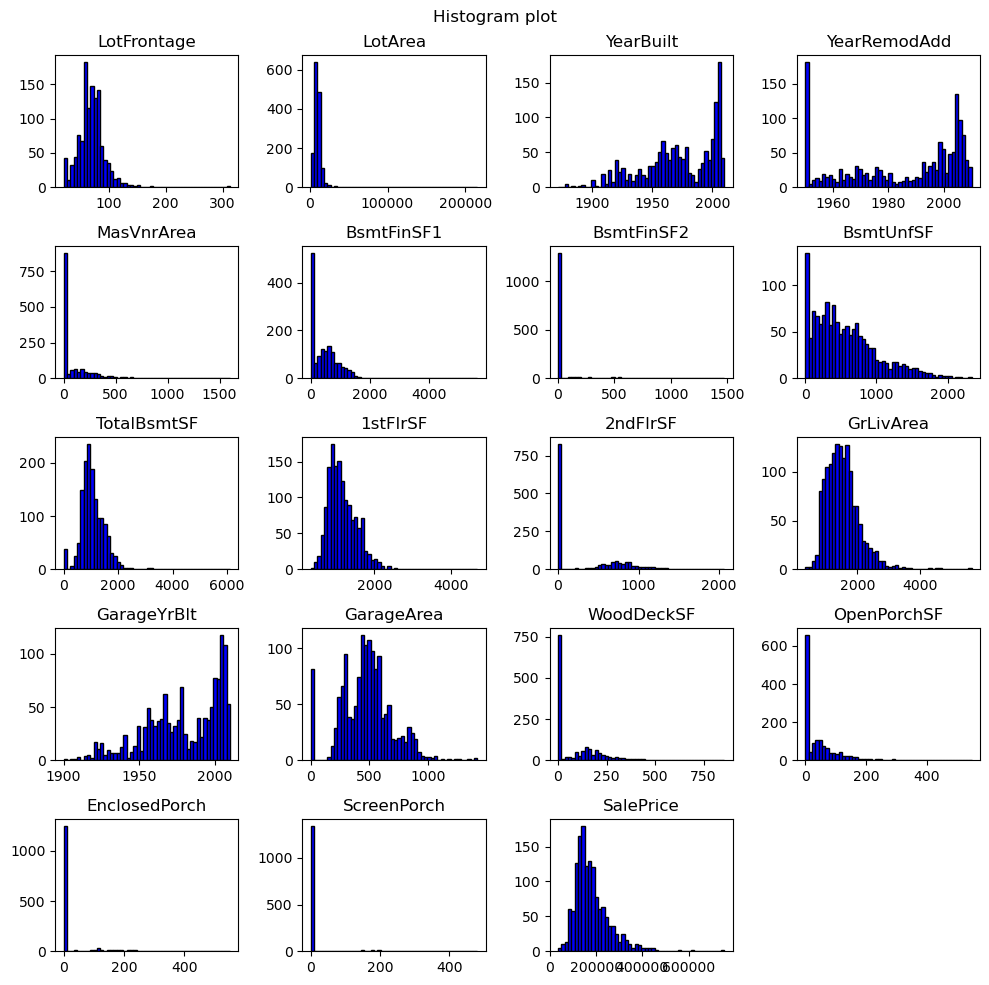

In [17]:
plt.figure(figsize=(10,10))
c = 1
plt.suptitle("Histogram plot")
for feature in continous_features:
    plt.subplot(5,4,c)
    c += 1
    plt.title("{}".format(feature))
    plt.hist(df[feature],bins=50,color="b",edgecolor="k")
plt.tight_layout()
plt.show()

In [18]:
print("SKEWNESS AND KURTOSIS VALUES \n\n")
for feature in continous_features:
    print("{}: SKEWNESS - {} KURTOSIS - {}".format(feature,skew(df[feature][df[feature].isnull() == False]),kurtosis(df[feature][df[feature].isnull() == False])))

SKEWNESS AND KURTOSIS VALUES 


LotFrontage: SKEWNESS - 2.160865994705543 KURTOSIS - 17.375300497599614
LotArea: SKEWNESS - 12.195142125084478 KURTOSIS - 202.5437927513529
YearBuilt: SKEWNESS - -0.612830724202899 KURTOSIS - -0.44215484565294716
YearRemodAdd: SKEWNESS - -0.5030444967597948 KURTOSIS - -1.2719991404772555
MasVnrArea: SKEWNESS - 2.6663261001607435 KURTOSIS - 10.04360232122905
BsmtFinSF1: SKEWNESS - 1.6837708962341815 KURTOSIS - 11.076089857631942
BsmtFinSF2: SKEWNESS - 4.250888017057445 KURTOSIS - 20.04041549471293
BsmtUnfSF: SKEWNESS - 0.9193227015582005 KURTOSIS - 0.4692620789683075
TotalBsmtSF: SKEWNESS - 1.522688086978629 KURTOSIS - 13.201041630635025
1stFlrSF: SKEWNESS - 1.3753417421837937 KURTOSIS - 5.722076026587489
2ndFlrSF: SKEWNESS - 0.8121942731961613 KURTOSIS - -0.5556767272864769
GrLivArea: SKEWNESS - 1.365155954773434 KURTOSIS - 4.874265760253215
GarageYrBlt: SKEWNESS - -0.6487080129813099 KURTOSIS - -0.42117353578557015
GarageArea: SKEWNESS - 0.1797959420587

* Many of the features have high value of negative skewness.Have to apply some powerfull transformation function

### DISTRIBUTION OF CATEGORICAL FEATURES

In [19]:
# No of unique values in each categorocal features 
for feature in categorical_features:
    print("{}: UNIQUE VALUES {}".format(feature,df[feature].nunique()))

MSSubClass: UNIQUE VALUES 15
MSZoning: UNIQUE VALUES 5
Street: UNIQUE VALUES 2
Alley: UNIQUE VALUES 2
LotShape: UNIQUE VALUES 4
LandContour: UNIQUE VALUES 4
Utilities: UNIQUE VALUES 2
LotConfig: UNIQUE VALUES 5
LandSlope: UNIQUE VALUES 3
Neighborhood: UNIQUE VALUES 25
Condition1: UNIQUE VALUES 9
Condition2: UNIQUE VALUES 8
BldgType: UNIQUE VALUES 5
HouseStyle: UNIQUE VALUES 8
OverallQual: UNIQUE VALUES 10
OverallCond: UNIQUE VALUES 9
RoofStyle: UNIQUE VALUES 6
RoofMatl: UNIQUE VALUES 8
Exterior1st: UNIQUE VALUES 15
Exterior2nd: UNIQUE VALUES 16
MasVnrType: UNIQUE VALUES 4
ExterQual: UNIQUE VALUES 4
ExterCond: UNIQUE VALUES 5
Foundation: UNIQUE VALUES 6
BsmtQual: UNIQUE VALUES 4
BsmtCond: UNIQUE VALUES 4
BsmtExposure: UNIQUE VALUES 4
BsmtFinType1: UNIQUE VALUES 6
BsmtFinType2: UNIQUE VALUES 6
Heating: UNIQUE VALUES 6
HeatingQC: UNIQUE VALUES 5
CentralAir: UNIQUE VALUES 2
Electrical: UNIQUE VALUES 5
LowQualFinSF: UNIQUE VALUES 24
BsmtFullBath: UNIQUE VALUES 4
BsmtHalfBath: UNIQUE VALUES 

In [20]:
len(categorical_features)

61

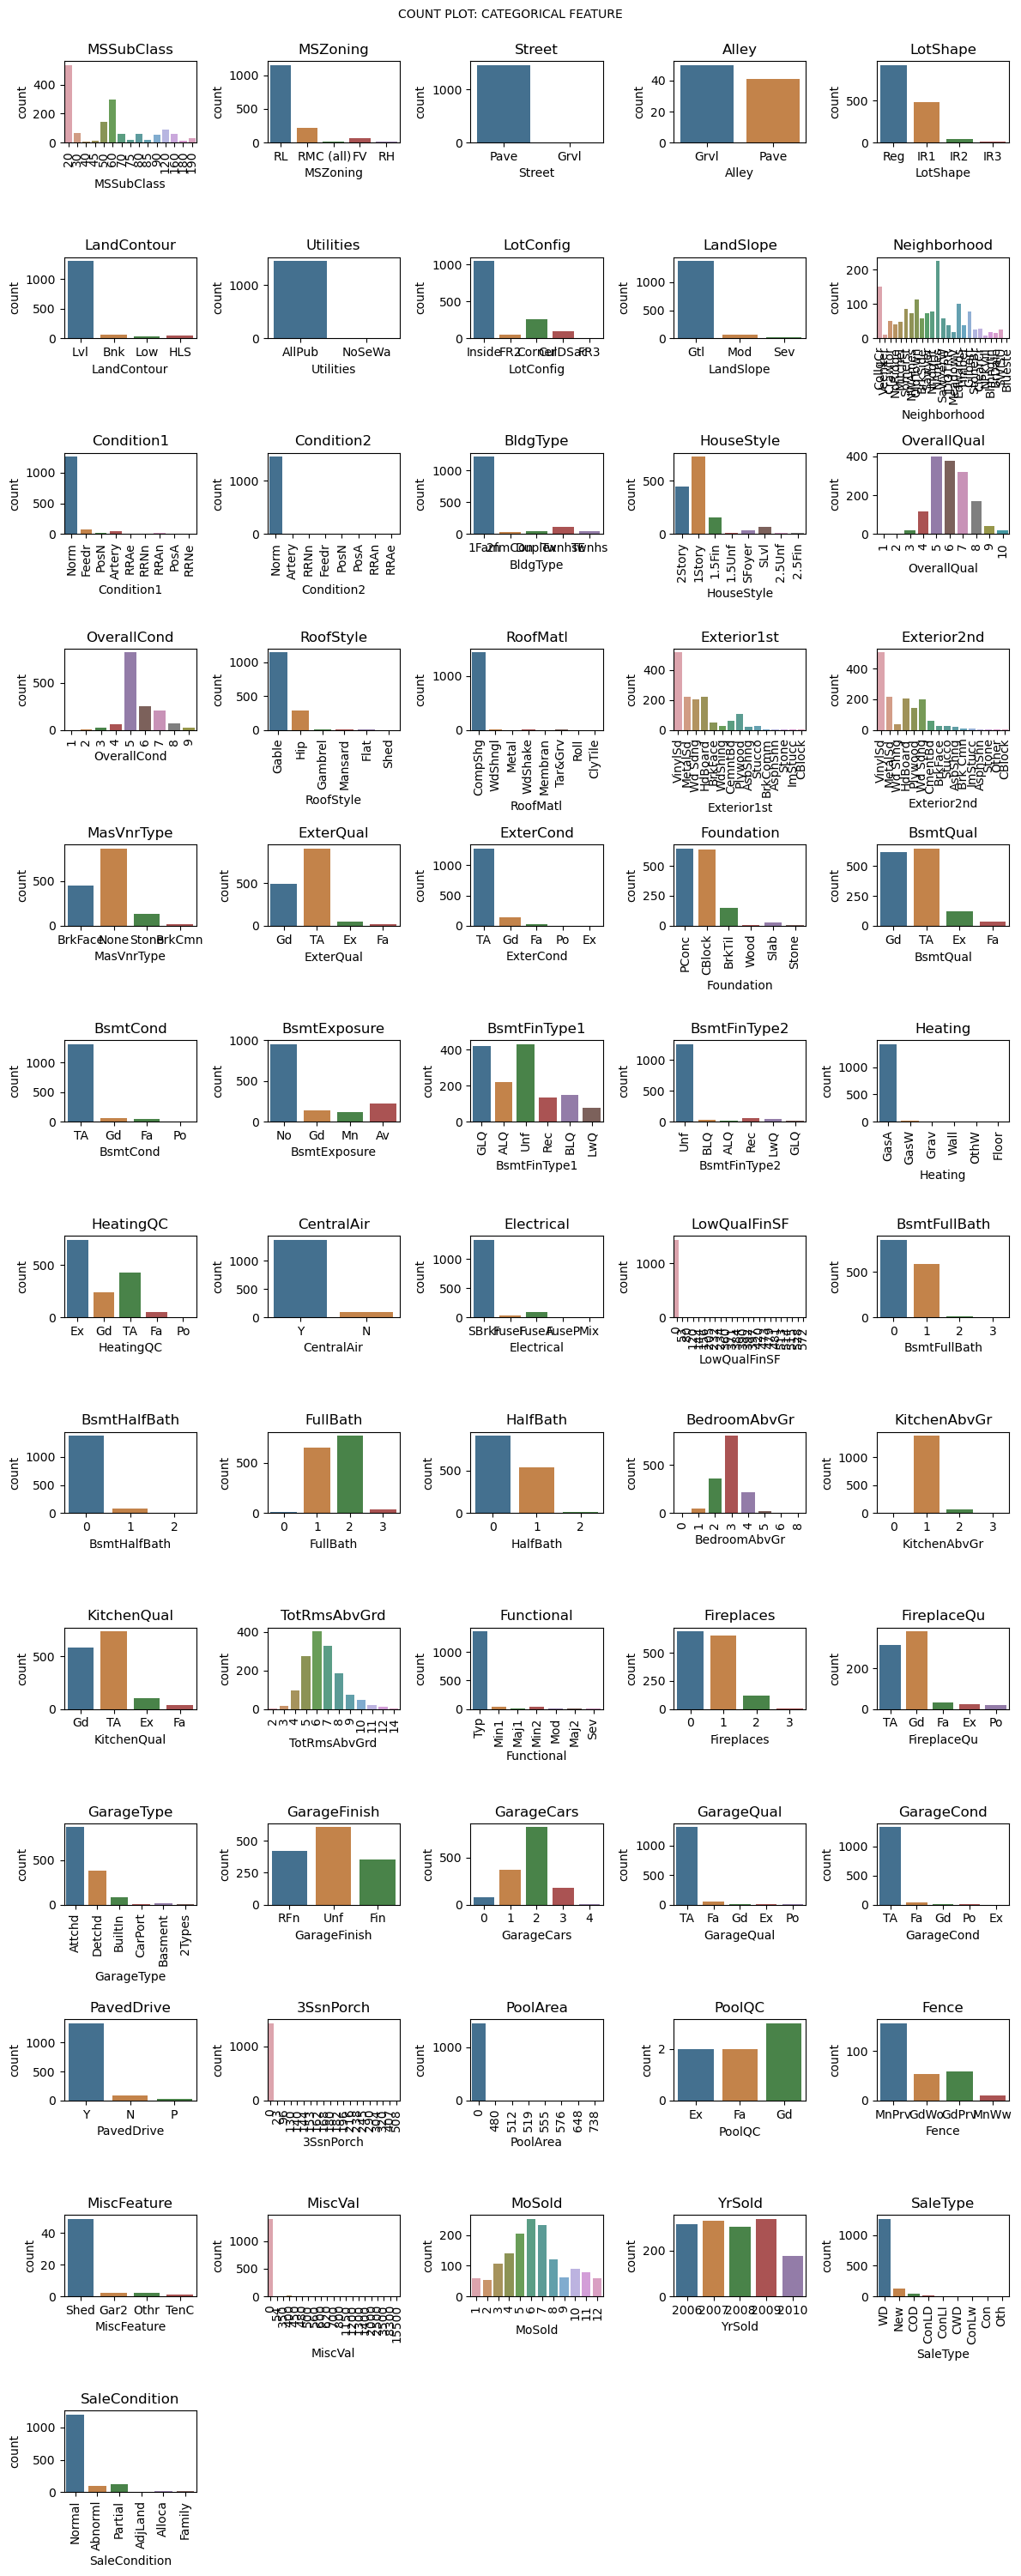

In [21]:
# count plot of categorical features
plt.figure(figsize=(12,30))
plt.suptitle("COUNT PLOT: CATEGORICAL FEATURE",y=0.999,fontsize=10)
c = 1
for feature in categorical_features:
    plt.subplot(13,5,c)
    c += 1
    plt.title("{}".format(feature))
    sns.countplot(x=feature,data=df,saturation=0.5)
    if df[feature].nunique() > 5:
        plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### CORELATION ANALYSIS 

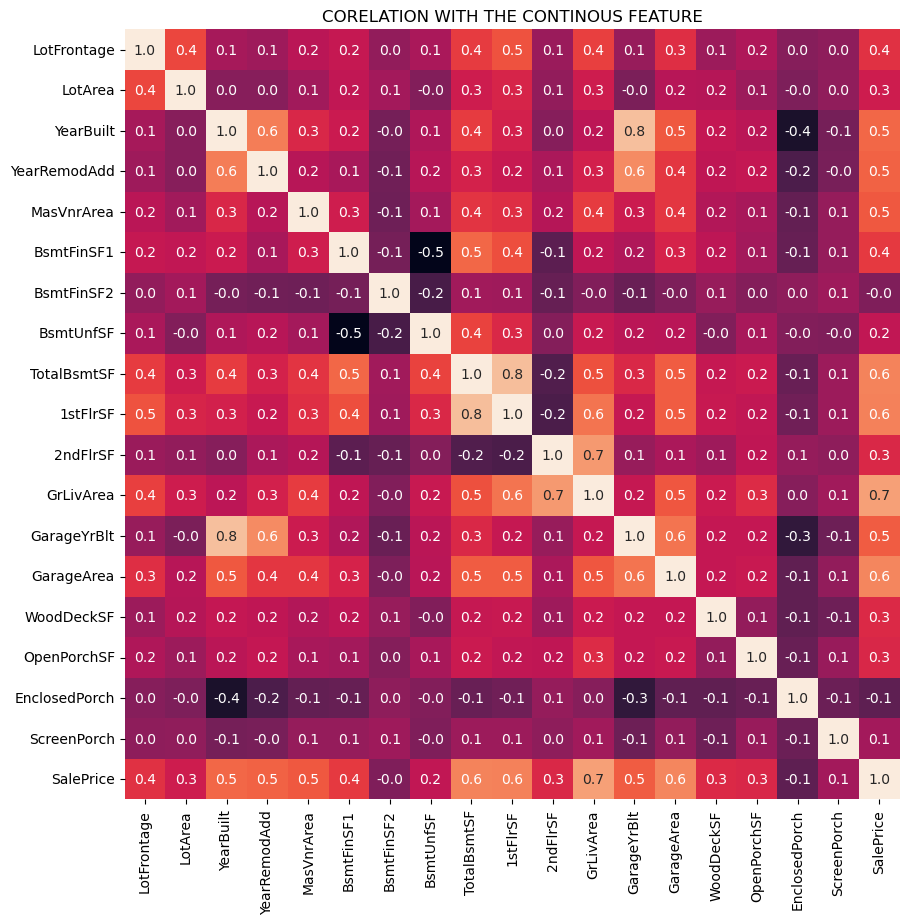

In [22]:
plt.figure(figsize=(10,10))
plt.title("CORELATION WITH THE CONTINOUS FEATURE")
sns.heatmap(df[continous_features].corr(),annot=True,cbar=False,fmt="0.1f")
plt.show()

* There are plenty of multicolinear features that we can remove in later on feature engineering phase

In [23]:
# before finding the corlation analysis of categorical feature.we have to encode to numerical value 
data = df.copy()
encoder = LabelEncoder()

for feature in categorical_features:
    if data[feature].dtype == "object":
        data[feature] = encoder.fit_transform(data[feature])
        data[feature] = data[feature].astype("int")

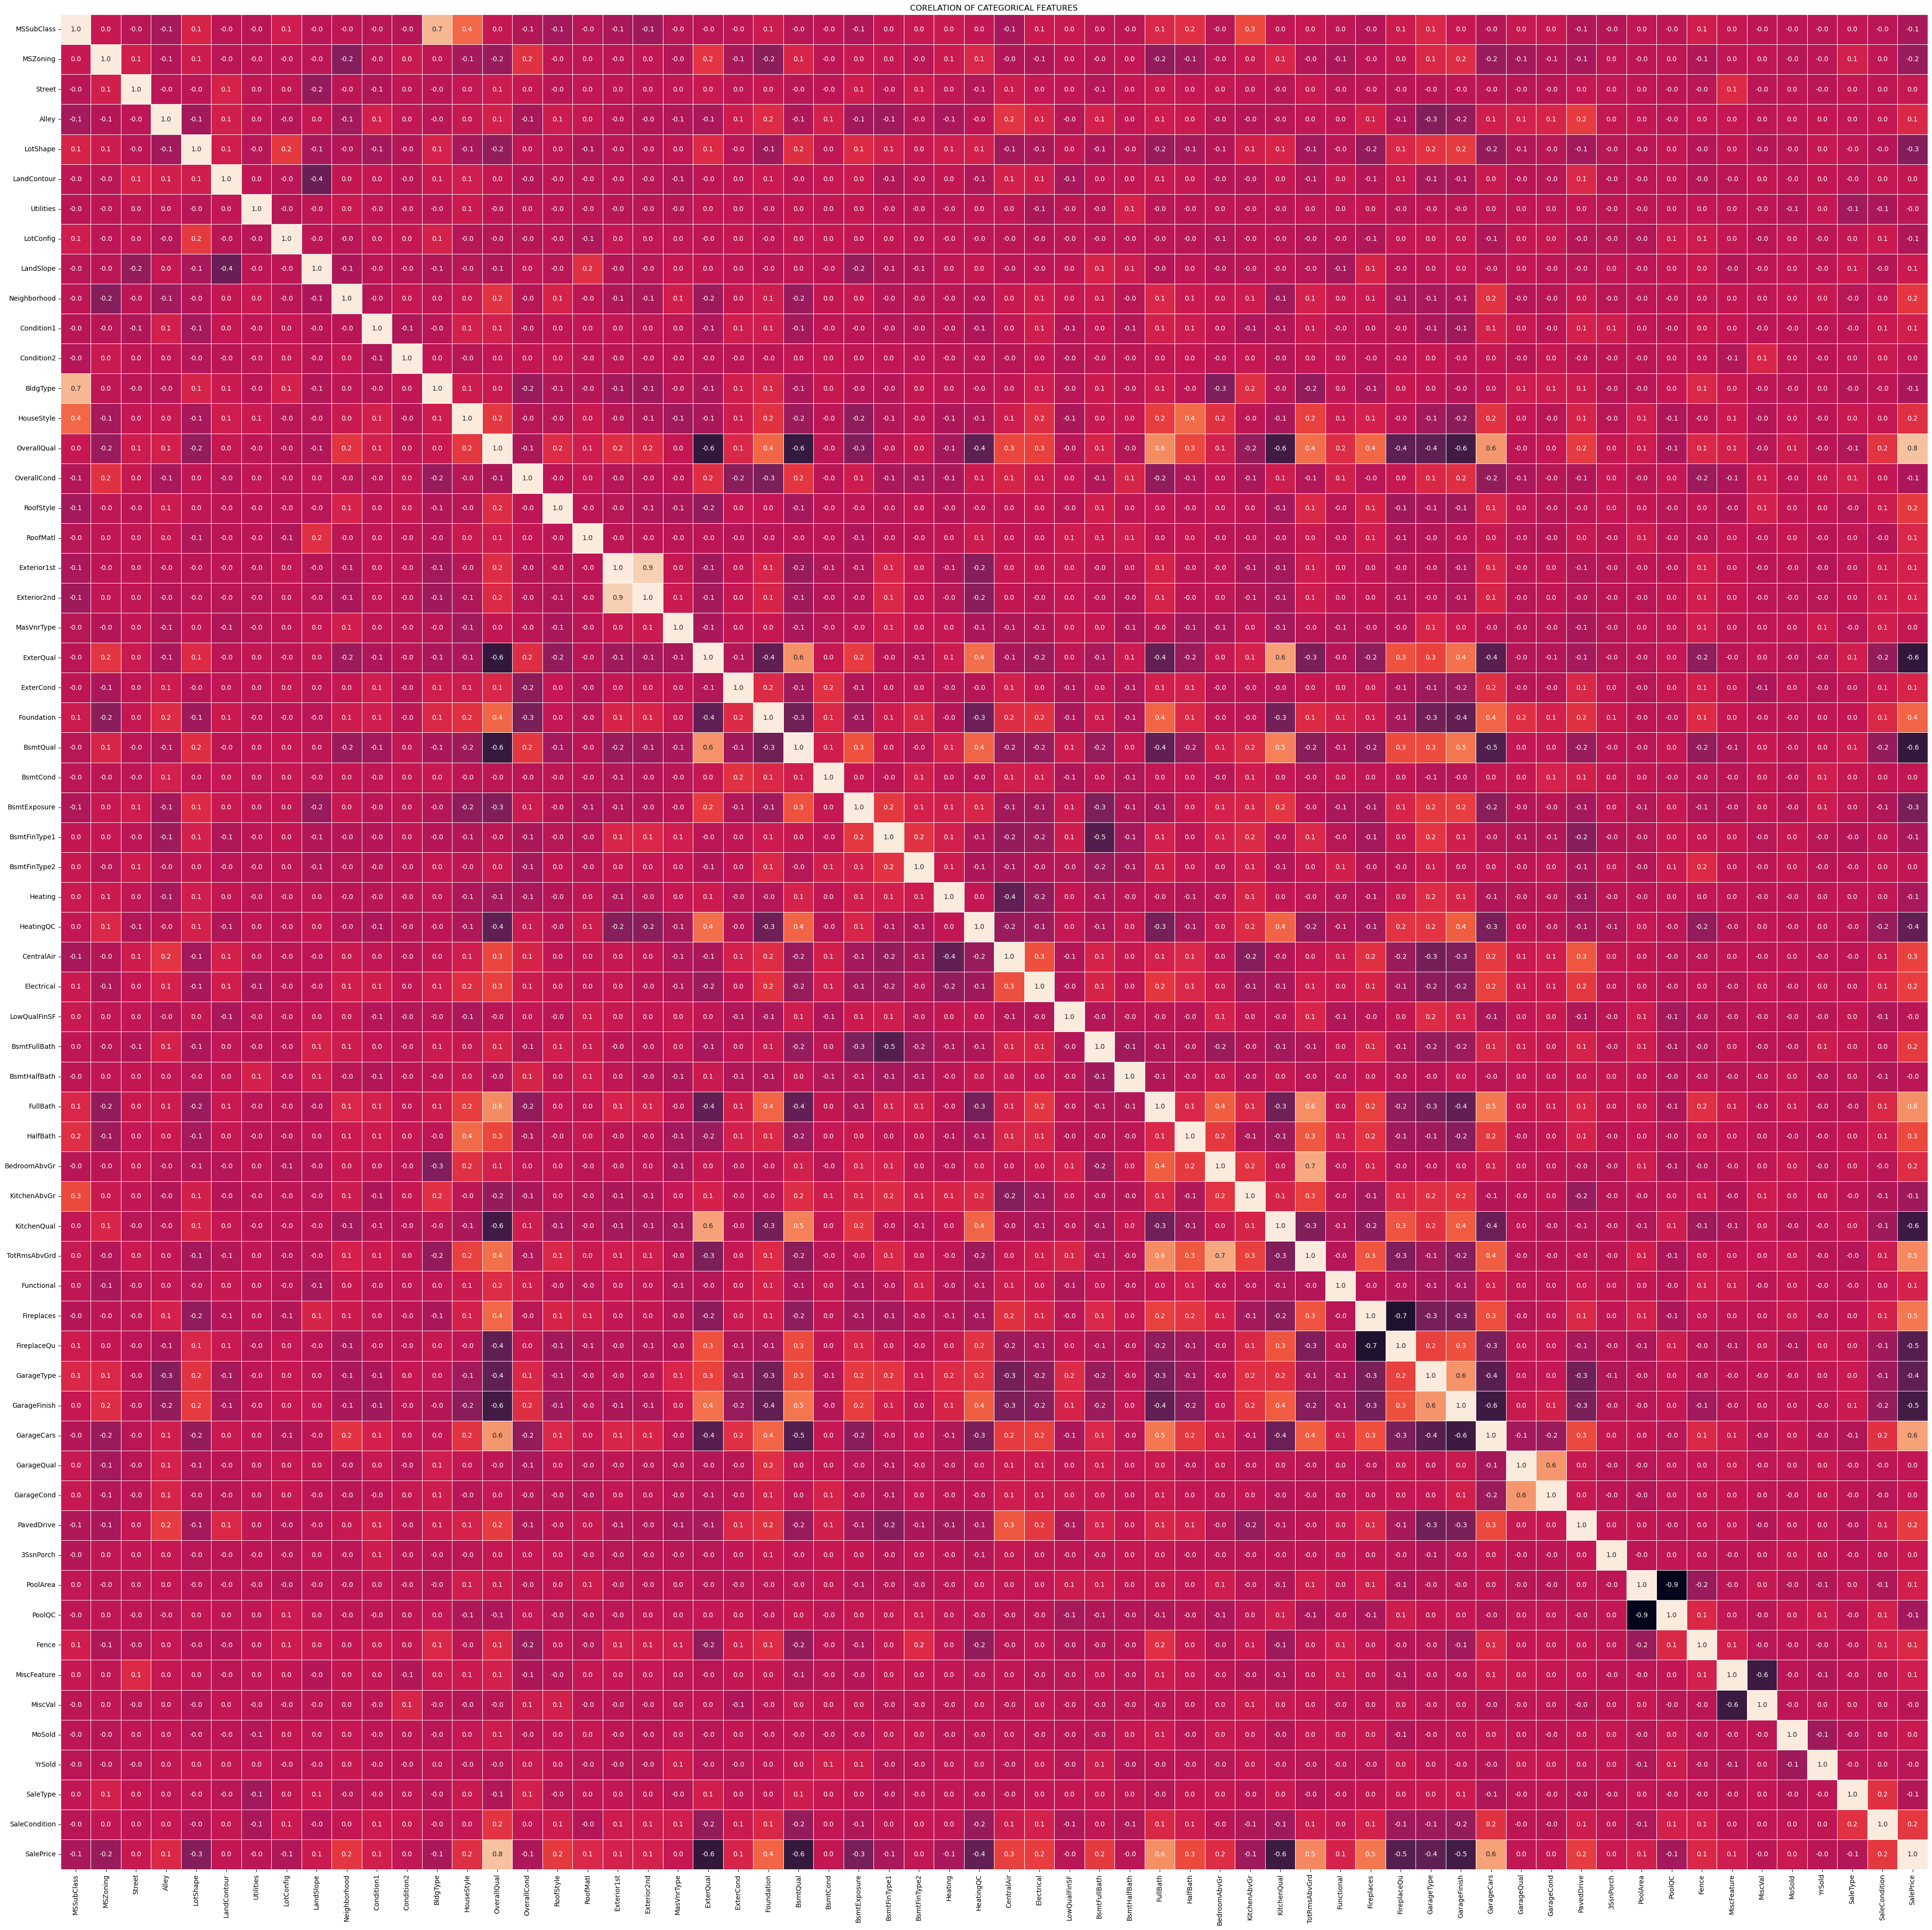

In [24]:
# Categorical feature
plt.figure(figsize=(50,50))
plt.title("CORELATION OF CATEGORICAL FEATURES")
sns.heatmap(data[categorical_features+["SalePrice"]].corr(),annot=True,cbar=False,linewidth=0.5,fmt="0.1f")
plt.show()

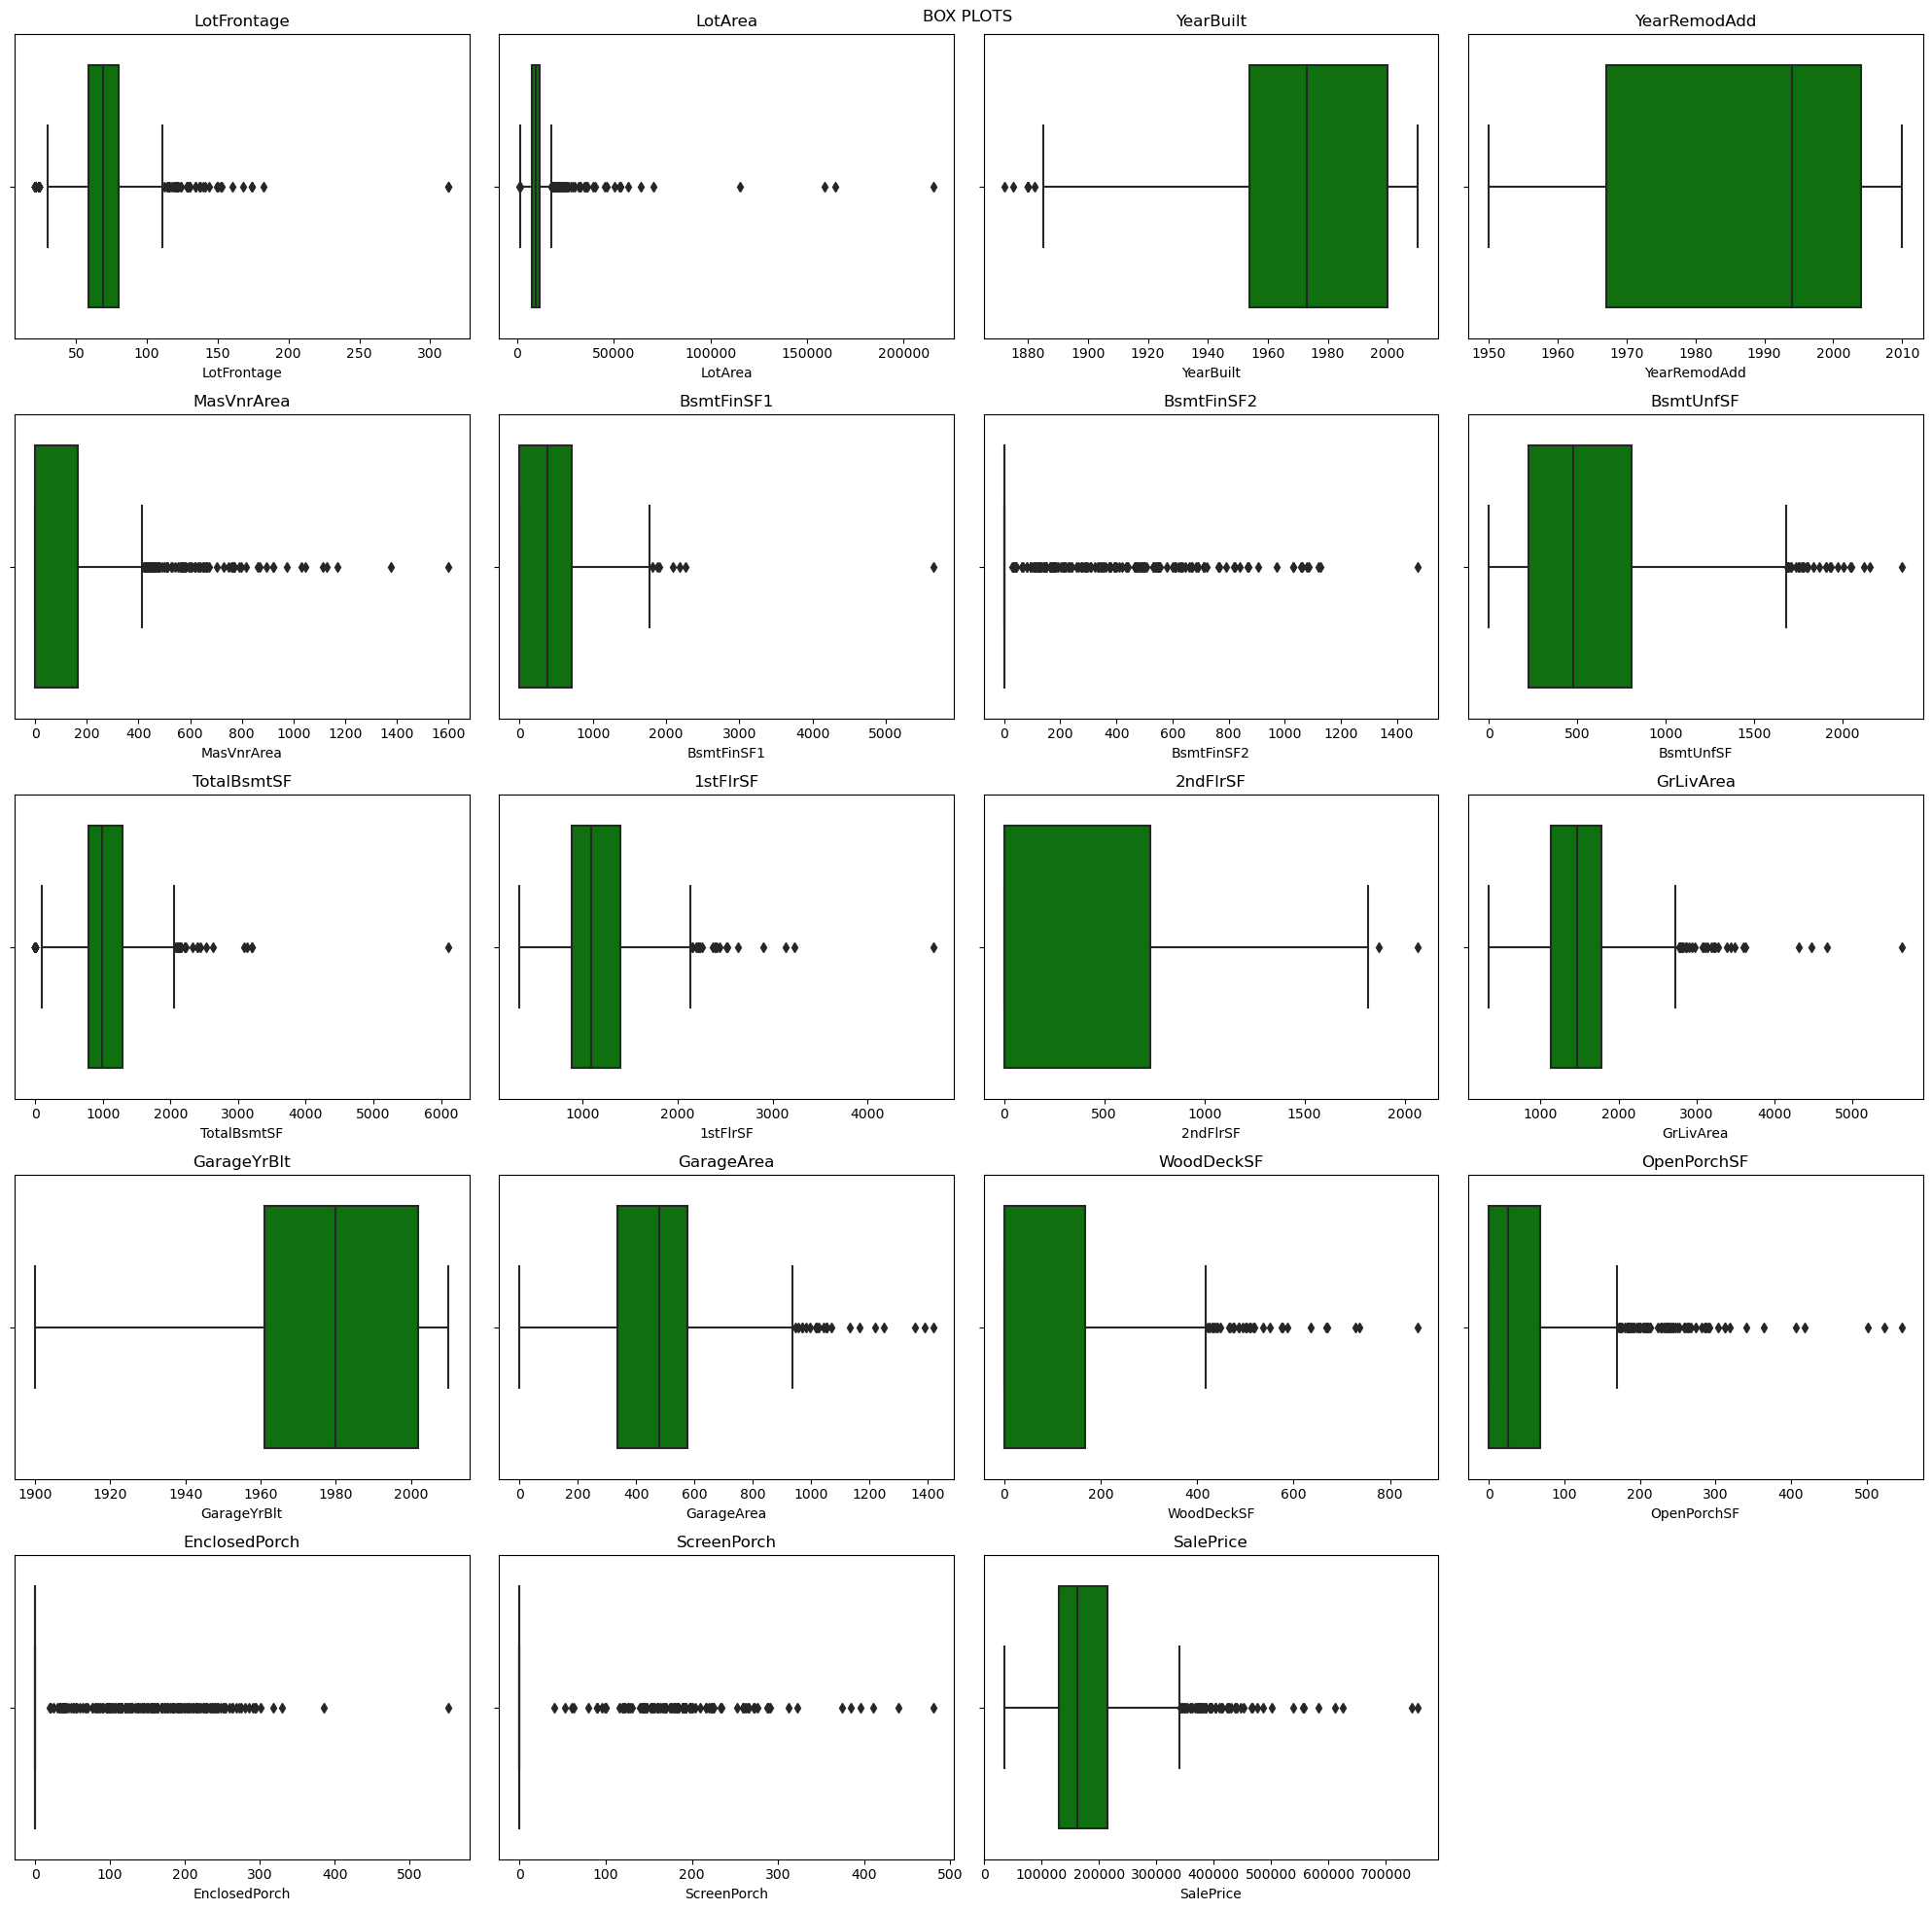

In [41]:
c = 1
plt.figure(figsize=(20,20))
plt.suptitle("BOX PLOTS")

for feature in continous_features:
    plt.subplot(5,4,c)
    c += 1
    plt.title(feature)
    sns.boxplot(x=feature,data = df,color="g",saturation=0.75)
plt.tight_layout()
plt.show()

* Majority of the features are having Outliers.So,we have to handle the noise.